In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SA Feedback Surveys_FINAL/2017/Student Feedback Surveys-Superview.csv')

In [48]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Cat
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


In [4]:
df[df["Week"] == "Week 1"]["Rating (Num)"].apply(lambda x:int(x)).describe()

count    288.000000
mean       8.267361
std        1.448793
min        3.000000
25%        8.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: Rating (Num), dtype: float64

In [5]:
df.groupby("Week")["Rating (Num)"].value_counts()

Week    Rating (Num)
Week 1  8               91
        10              68
        9               61
        7               40
        6               12
                        ..
Week 7  3                1
Week 8  10               4
        9                3
        7                1
        8                1
Name: Rating (Num), Length: 64, dtype: int64

In [6]:
df.groupby("Week").count()

,ID,Location,Track,Rating (Num),Schedule Pacing
Week,,,,,
Week 1,288,276,276,288,288
Week 2,277,261,261,277,276
Week 3,243,233,233,243,241
Week 4,193,189,189,193,193
Week 5,179,176,176,179,179
Week 6,144,143,143,144,144
Week 7,120,119,119,120,120
Week 8,9,9,9,9,9


How many more promoters are there than detractors across our 2017 data?

 - Overall, there were 760 promoters to 124 detractors
 - 569 Passives

Which track boasts the best promoter-to-detractor ratio?

 - Games are the track with the highest promotor:detractor ratio that has a significant population (>0.05)
 - VR and Games, Explorer had higher ratios, but low populations
 - Apps, Explorer is the track with the highest Detractor ratio, and the highest Passive

Does the student experience get better the longer that they are enrolled at the Summer Academy?

 - Overall yes, especially if they stay to week 8
 - There was a dip after week 3 that wasn't fully recovered until week 6 however
 
Does student satisfaction vary by location?

 - Yes, fairly widely
 - Hong Kong has the largest percentage of Detractors, but NYC has the largest number
 - Atlanta has the largest percentage of Promoters, but SF has the largest number
 - The Hong Kong branch had the lowest percentage of Promoters and the lowest number
 - Oakland and Beijing had the lowest percentage of Detractors and the lowest number

What are things we could find here that could “help the business”?

 - Figuring out how to adjust pacing
 - Choosing which branches to expand or shut down
 - Choosing tracks to improve

What sorts of information does this dataset contain?

 - Ratings, locations, and pacing experience of various individuals across various tracks

What kinds of questions might we be able to answer with this data?

 - Which tracks and locations had the best and worst overall experience
 - How experiences in general changed over time
 - How pacing was perceived

What kinds of questions can’t we answer with this data?

 - What curriculum was being used
 - The instructors responsible
 - Outside factors that might impact enjoyment (e.g. commute, standard of living)
 - Tracking one individual's experience over time

What sorts of information might be actionable?

 - Speeding up parts that are too slow, or vice versa
 - Deciding which tracks to put focus on for the best improvement

How can you present your findings in a way that non-technical employees can understand and use to make decisions?

 - Graphs and conclusive statements that are confirmed by data

In [20]:
df['Track'].value_counts(normalize=True)

Apps               0.619488
Apps, Explorer     0.159317
Games              0.147937
VR                 0.042674
Games, Explorer    0.030583
Name: Track, dtype: float64

In [8]:
pd.crosstab(df['Rating (Num)'], df['Week'])

Week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Rating (Num),,,,,,,,
#ERROR!,0,1,2,0,0,0,0,0
0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0
10,68,61,66,45,52,43,37,4
2,0,0,0,0,1,1,0,0
3,1,2,1,2,0,1,1,0
4,6,2,0,3,2,0,0,0
5,9,6,5,6,4,1,4,0
6,12,12,13,8,7,5,2,0


In [12]:
df["Rating (Num)"] = df["Rating (Num)"].apply(lambda x: int(x) if (x != "#ERROR!") else 5)

In [43]:
pd.crosstab(df['Rating (Num)'], df['Week'])

Week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Rating (Num),,,,,,,,
0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0
2,0,0,0,0,1,1,0,0
3,1,2,1,2,0,1,1,0
4,6,2,0,3,2,0,0,0
5,9,7,7,6,4,1,4,0
6,12,12,13,8,7,5,2,0
7,40,34,22,25,22,18,15,1
8,91,82,64,49,45,41,19,1


In [64]:
weeks = sorted(df["Week"].unique())
means = []
for week in weeks:
    means.append(df[df.Week == week]["Rating (Num)"].mean())
print(means)

[8.26736111111111, 8.335740072202166, 8.493827160493828, 8.33160621761658, 8.441340782122905, 8.541666666666666, 8.6, 9.11111111111111]


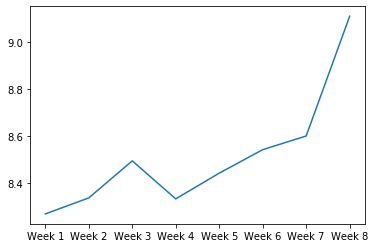

In [65]:
sns.lineplot(weeks, means)
# Average NPS rating generally trends up over time, though did dip after week 3

In [14]:
df["NPS_Cat"] = df["Rating (Num)"].apply(lambda x: "Promoter" if (x >= 9) else ("Detractor" if x <= 6 else "Passive"))

In [15]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Cat
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


In [16]:
df.tail()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Cat
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right,Promoter
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right,Passive
1450,1497,New York City,Apps,Week 7,10,Just right,Promoter
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow,Detractor
1452,1499,New York City,Apps,Week 5,8,Just right,Passive


In [17]:
df["NPS_Cat"].value_counts()
# Far more Promoters than Detractors overall

Promoter     760
Passive      569
Detractor    124
Name: NPS_Cat, dtype: int64

In [88]:
(760 - 124) / (760 + 569 + 124)

0.4377150722642808

In [19]:
pd.crosstab(df["Track"], df["NPS_Cat"], normalize='index')
# Games are the track with the highest promotor:detractor ratio that has a significant population (>0.05)
# Apps, Explorer is the track with the highest Detractor ratio, and the highest Passive

NPS_Cat,Detractor,Passive,Promoter
Track,,,
Apps,0.089552,0.407577,0.502870
"Apps, Explorer",0.107143,0.486607,0.406250
Games,0.043269,0.317308,0.639423
"Games, Explorer",0.000000,0.279070,0.720930
VR,0.033333,0.200000,0.766667


In [40]:
pd.crosstab(df["Location"], df["NPS_Cat"], normalize='index')
# Hong Kong has the largest percentage of Detractors, but NYC has the largest number
# Atlanta has the largest percentage of Promoters, but SF has the largest number
# The Hong Kong branch had the lowest percentage of Promoters and the lowest number
# Oakland and Beijing had the lowest percentage of Detractors and the lowest number

NPS_Cat,Detractor,Passive,Promoter
Location,,,
Atlanta,0.000000,0.272727,0.727273
Beijing,0.000000,0.320513,0.679487
Chicago,0.057143,0.414286,0.528571
Hong Kong,0.272727,0.636364,0.090909
Los Angeles,0.047170,0.311321,0.641509
New York City,0.106061,0.412121,0.481818
Oakland,0.042553,0.382979,0.574468
Redwood City,0.086207,0.396552,0.517241
San Francisco,0.086111,0.375000,0.538889


In [36]:
df[df["Location"] == "Atlanta"]["Rating (Num)"].value_counts()

10    14
9     10
8      8
7      1
Name: Rating (Num), dtype: int64

In [38]:
df["Location"].value_counts()

San Francisco    360
New York City    330
Santa Clara      201
Los Angeles      106
Beijing           78
Chicago           70
Tokyo             65
Redwood City      58
Oakland           47
Washington DC     47
Atlanta           33
Hong Kong         11
Name: Location, dtype: int64

In [28]:
df[df.Location == "New York City"]["Track"].value_counts(normalize=True)

Apps               0.587879
Games              0.178788
Apps, Explorer     0.148485
Games, Explorer    0.084848
Name: Track, dtype: float64

In [30]:
df[df.Track == "Apps, Explorer"]["Location"].value_counts(normalize=True)

San Francisco    0.343750
New York City    0.218750
Santa Clara      0.111607
Atlanta          0.080357
Chicago          0.080357
Washington DC    0.075893
Hong Kong        0.044643
Oakland          0.035714
Beijing          0.008929
Name: Location, dtype: float64

In [71]:
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Cat
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor
...,...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right,Promoter
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right,Passive
1450,1497,New York City,Apps,Week 7,10,Just right,Promoter
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow,Detractor


In [72]:
df["Schedule Pacing"].value_counts()

Just right           1034
A little too fast     289
A little too slow     100
Way too fast           23
Way too slow            4
Name: Schedule Pacing, dtype: int64

In [87]:
pd.crosstab(df["Schedule Pacing"], df["Week"], normalize='columns')
# The majority of people thought the pacing was just right
# A large minority thought it was a little too fast
# A tiny minority thought it was way too fast
# A small minority thought it was a little too slow
# A negligible minority thought it was way too slow
# As time goes on, excepting week 2, more and more people thought it was just right

Week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Schedule Pacing,,,,,,,,
A little too fast,0.222222,0.289855,0.203320,0.155440,0.162011,0.145833,0.125000,0.111111
A little too slow,0.135417,0.097826,0.058091,0.041451,0.033520,0.013889,0.016667,0.222222
Just right,0.621528,0.583333,0.726141,0.782383,0.798883,0.826389,0.841667,0.555556
Way too fast,0.017361,0.025362,0.008299,0.015544,0.005587,0.013889,0.016667,0.111111
Way too slow,0.003472,0.003623,0.004149,0.005181,0.000000,0.000000,0.000000,0.000000


In [76]:
pd.crosstab(df["Schedule Pacing"], df["Location"])
# The above holds broadly true across most locations
# Hong Kong in particular had a majority say it was a little too fast
# San Francisco and Tokyo had especially large minorities say it was a little too fast
# Redwood City and Atlanta had especially small minorities say it was a little too fast

Location,Atlanta,Beijing,Chicago,Hong Kong,Los Angeles,New York City,Oakland,Redwood City,San Francisco,Santa Clara,Tokyo,Washington DC
Schedule Pacing,,,,,,,,,,,,
A little too fast,5,23,26,6,19,34,13,7,64,46,22,11
A little too slow,1,7,3,2,10,19,5,5,24,11,5,5
Just right,27,46,40,3,76,271,29,46,265,141,36,29
Way too fast,0,2,1,0,1,6,0,0,6,1,2,2
Way too slow,0,0,0,0,0,0,0,0,1,2,0,0


## Conclusions:
 - Shut down the Hong Kong branch; it isn't worth the operating costs
 - Speed up the pace a little bit everywhere except Atlanta and Redwood City
 - Expand the Atlanta, Oakland, and Beijing branches. They responded very positively there
 - Put more focus on Games and Games, Explorer, less on Apps, Explorer
 - Keep an eye on Week 3-4 to ensure people don't lose interest

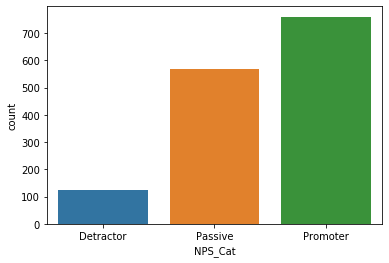

In [94]:
plt.show(sns.countplot(df["NPS_Cat"]))

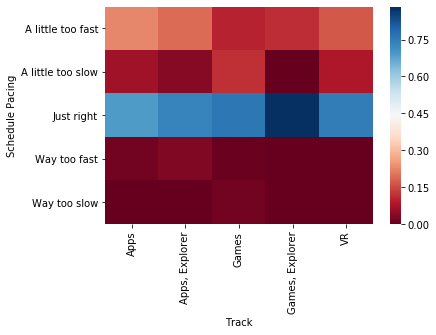

In [122]:
sns.heatmap(pd.crosstab(df["Schedule Pacing"], df["Track"], normalize='columns'), cmap="RdBu")
# Apps and Apps, Explorer are moving too fast

In [102]:
df[df.Location == 'Atlanta']["Track"].value_counts()

Apps, Explorer    18
Apps              15
Name: Track, dtype: int64

In [103]:
df[df.Location == 'Redwood City']["Track"].value_counts()

Apps    58
Name: Track, dtype: int64

In [110]:
df[df.Location == "Hong Kong"].describe()

,ID,Rating (Num)
count,11.000000,11.000000
mean,656.090909,7.181818
std,119.557061,1.167748
min,550.000000,5.000000
25%,552.500000,6.500000
50%,555.000000,7.000000
75%,770.000000,8.000000
max,807.000000,9.000000


In [113]:
df[df.Week == 'Week 8']

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Cat
1354,1401,San Francisco,VR,Week 8,10,Just right,Promoter
1395,1442,Los Angeles,Games,Week 8,7,Way too fast,Passive
1396,1443,Los Angeles,Apps,Week 8,9,Just right,Promoter
1397,1444,Los Angeles,Games,Week 8,9,Just right,Promoter
1398,1445,Los Angeles,Apps,Week 8,10,Just right,Promoter
1399,1446,Los Angeles,Games,Week 8,9,A little too slow,Promoter
1400,1447,Los Angeles,Apps,Week 8,10,Just right,Promoter
1415,1462,Los Angeles,Apps,Week 8,10,A little too fast,Promoter
1418,1465,Los Angeles,Games,Week 8,8,A little too slow,Passive
